# Desafio Estágio em Análise de Dados - SEAZONE

## Web scraping com Python e Beautiful Soup

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
from unidecode import unidecode
import warnings
warnings.filterwarnings('ignore')

In [23]:
# Lendo o dataset
df = pd.read_excel("planilha_de_anncios_-_florianpolis_-_igor_almeida.xlsx")

In [24]:
df.shape

(80, 7)

In [25]:
df.head()

,Listing,Bedrooms,Days Avaliable,Avg Daily Rate,Occ.,Revenue,# Ratings
0,https://www.airbnb.com/rooms/901903,1.0,313.0,268.0,0.56,47200.0,62.0
1,https://www.airbnb.com/rooms/901903,1.0,313.0,268.0,0.56,47200.0,62.0
2,https://www.airbnb.com/rooms/690060,1.0,272.0,268.0,0.33,24400.0,50.0
3,https://www.airbnb.com/rooms/5288261,1.0,312.0,200.0,0.21,12800.0,12.0
4,https://www.airbnb.com/rooms/50133767,1.0,213.0,394.0,0.50,42100.0,22.0


In [26]:
# Existem algumas linhas duplicadas, então vamos retirá-las
df = df.drop_duplicates()

In [27]:
# Trocando o nome da coluna '# Ratings' por 'Reviews', pois faz mais sentido
df = df.rename(columns={'# Ratings': 'Reviews'})

In [28]:
# Verificando
df.head()

,Listing,Bedrooms,Days Avaliable,Avg Daily Rate,Occ.,Revenue,Reviews
0,https://www.airbnb.com/rooms/901903,1.0,313.0,268.0,0.56,47200.0,62.0
2,https://www.airbnb.com/rooms/690060,1.0,272.0,268.0,0.33,24400.0,50.0
3,https://www.airbnb.com/rooms/5288261,1.0,312.0,200.0,0.21,12800.0,12.0
4,https://www.airbnb.com/rooms/50133767,1.0,213.0,394.0,0.50,42100.0,22.0
5,https://www.airbnb.com/rooms/49910078,1.0,235.0,418.0,0.57,56000.0,23.0


In [29]:
df.shape

(78, 7)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 0 to 79
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Listing         78 non-null     object 
 1   Bedrooms        78 non-null     float64
 2   Days Avaliable  78 non-null     float64
 3   Avg Daily Rate  78 non-null     float64
 4   Occ.            78 non-null     float64
 5   Revenue         78 non-null     float64
 6   Reviews         78 non-null     float64
dtypes: float64(6), object(1)
memory usage: 4.9+ KB


In [31]:
# Criando um novo dataframe apenas com os anúncios >= 200 dias disponíveis e >= 20 reviews
df_anuncios_validos = df[df['Days Avaliable'] >= 200][df['Reviews'] >= 20]

In [32]:
# Resetando o index para ficar em ordem novamente
df_anuncios_validos.reset_index(inplace=True, drop=True)
df_anuncios_validos

,Listing,Bedrooms,Days Avaliable,Avg Daily Rate,Occ.,Revenue,Reviews
0,https://www.airbnb.com/rooms/901903,1.0,313.0,268.0,0.56,47200.0,62.0
1,https://www.airbnb.com/rooms/690060,1.0,272.0,268.0,0.33,24400.0,50.0
2,https://www.airbnb.com/rooms/50133767,1.0,213.0,394.0,0.50,42100.0,22.0
3,https://www.airbnb.com/rooms/49910078,1.0,235.0,418.0,0.57,56000.0,23.0
4,https://www.airbnb.com/rooms/47422405,1.0,298.0,251.0,0.72,54200.0,38.0
5,https://www.airbnb.com/rooms/47221270,1.0,245.0,299.0,0.60,43700.0,21.0
6,https://www.airbnb.com/rooms/45802524,1.0,302.0,193.0,0.54,31500.0,28.0
7,https://www.airbnb.com/rooms/45676264,1.0,365.0,153.0,0.56,31300.0,40.0
8,https://www.airbnb.com/rooms/45077589,1.0,354.0,257.0,0.42,38000.0,26.0
9,https://www.airbnb.com/rooms/44322051,1.0,245.0,367.0,0.69,62000.0,20.0


In [33]:
# Exportando a nova tabela para ser trabalhada a partir de agora
df_anuncios_validos.to_excel('tab_seazone_tratados.xlsx',index=False)

In [16]:
# Salvando os links somente dos anúncios válidos em uma lista
list_anuncios_validos = df_anuncios_validos.Listing.values
print(list_anuncios_validos)
print(len(list_anuncios_validos))

['https://www.airbnb.com/rooms/901903'
 'https://www.airbnb.com/rooms/690060'
 'https://www.airbnb.com/rooms/50133767'
 'https://www.airbnb.com/rooms/49910078'
 'https://www.airbnb.com/rooms/47422405'
 'https://www.airbnb.com/rooms/47221270'
 'https://www.airbnb.com/rooms/45802524'
 'https://www.airbnb.com/rooms/45676264'
 'https://www.airbnb.com/rooms/45077589'
 'https://www.airbnb.com/rooms/44322051'
 'https://www.airbnb.com/rooms/44321789'
 'https://www.airbnb.com/rooms/44114093'
 'https://www.airbnb.com/rooms/4148993'
 'https://www.airbnb.com/rooms/41406424'
 'https://www.airbnb.com/rooms/4075739'
 'https://www.airbnb.com/rooms/40701296'
 'https://www.airbnb.com/rooms/40426283'
 'https://www.airbnb.com/rooms/39055969'
 'https://www.airbnb.com/rooms/37110904'
 'https://www.airbnb.com/rooms/36598119'
 'https://www.airbnb.com/rooms/36453155'
 'https://www.airbnb.com/rooms/35574792'
 'https://www.airbnb.com/rooms/34749528'
 'https://www.airbnb.com/rooms/34749170'
 'https://www.airbnb.c

## Criando função para capturar as informações necesárias das páginas

In [14]:
# Função
dados_extraidos = []
def extract_info(list_anuncios):
    
    import time  
    for link in list_anuncios:
        anuncios = []
        soup = BeautifulSoup(requests.get(link).content, 'html.parser')
        try:
            anuncios.append(soup.find("span", {"class": "_9xiloll"}).get_text())
        except:
            anuncios.append("Not Available")
            
        try:
            anuncios.append(soup.find("span", {"class": "_17p6nbba"}).get_text())
        except:
            anuncios.append("Not Available")
            
        try:     
            anuncios.append(soup.find("span", {"class": "_4oybiu"}).get_text())
        except:
            anuncios.append("Not Available")
            
        try:     
            anuncios.append(soup.find("div", {"class": "_1byskwn"}).get_text(","))
        except:
            anuncios.append("Not Available") 
            
        dados_extraidos.append(anuncios)
            
        time.sleep(2)
        
    return dados_extraidos 

In [17]:
extract_info(list_anuncios_validos)

[['Florianopolis, Santa Catarina, Brazil',
  '4.72 ·',
  '4.6',
  'Kitchen,Wifi,Free parking on premises,Pool,TV,Air conditioning,Hair dryer,Refrigerator,Unavailable: Carbon monoxide alarm,Carbon monoxide alarm,Unavailable: Smoke alarm,Smoke alarm'],
 ['Florianopolis, Santa Catarina, Brazil',
  '4.91 ·',
  '4.9',
  'Beach access,Kitchen,Wifi,Free street parking,Pool,TV,Washer,Air conditioning,Unavailable: Carbon monoxide alarm,Carbon monoxide alarm,Unavailable: Smoke alarm,Smoke alarm'],
 ['Jurerê Internacional, Santa Catarina, Brazil',
  '4.94 ·',
  '4.8',
  'Park view,Beach access,Kitchen,Wifi,Free parking on premises,TV with standard cable,Elevator,Washer,Unavailable: Carbon monoxide alarm,Carbon monoxide alarm,Unavailable: Smoke alarm,Smoke alarm'],
 ['Jurerê Internacional, Santa Catarina, Brazil',
  '4.93 ·',
  '4.9',
  'Ocean view,Garden view,Beach access – Beachfront,Kitchen,Wifi,Free parking on premises,Shared pool,TV,Elevator,EV charger'],
 ['Lagoa da Conceição, Santa Catarina

In [18]:
# Criando um dataframe com as informações capturadas
dados_airbnb = pd.DataFrame(dados_extraidos, columns=['Bairro', 'Rating', 'Localizacao', 'Quali_fisica'])

In [19]:
# Verificando
dados_airbnb

,Bairro,Rating,Localizacao,Quali_fisica
0,"Florianopolis, Santa Catarina, Brazil",4.72 ·,4.6,"Kitchen,Wifi,Free parking on premises,Pool,TV,..."
1,"Florianopolis, Santa Catarina, Brazil",4.91 ·,4.9,"Beach access,Kitchen,Wifi,Free street parking,..."
2,"Jurerê Internacional, Santa Catarina, Brazil",4.94 ·,4.8,"Park view,Beach access,Kitchen,Wifi,Free parki..."
3,"Jurerê Internacional, Santa Catarina, Brazil",4.93 ·,4.9,"Ocean view,Garden view,Beach access – Beachfro..."
4,"Lagoa da Conceição, Santa Catarina, Brazil",4.88 ·,4.8,"Garden view,Sea view,Beach access – Beachfront..."
5,"Centro, Santa Catarina, Brazil",5.0 ·,5.0,"Beach access – Beachfront,Kitchen,Wifi,Dedicat..."
6,"Centro, Santa Catarina, Brazil",4.78 ·,4.6,"Kitchen,Wifi,Free parking on premises,Pool,Ele..."
7,Not Available,Not Available,Not Available,Not Available
8,"Barra da Lagoa, Santa Catarina, Brazil",4.87 ·,5.0,"Lake access,Kitchen,Wifi,Free parking on premi..."
9,"Centro, Santa Catarina, Brazil",4.56 ·,4.4,"Beach access – Beachfront,Kitchen,Wifi,Dedicat..."


In [20]:
dados_airbnb.shape

(46, 4)

In [21]:
# Exportando a nova tabela para ser trabalhada a partir de agora
dados_airbnb.to_excel('dados_airbnb.xlsx',index=False)

### EDA / Pré-processamento, limpeza dos dados, construção de features

In [2]:
# Lendo os datasets
df_dados_airbnb = pd.read_excel("dados_airbnb.xlsx")
df_tab_seazone_tratados = pd.read_excel("tab_seazone_tratados.xlsx")

![tabela_descricao](tab_descricao.png)

In [18]:
df_dados_airbnb.head()

,Bairro,Rating,Localizacao,Quali_fisica
0,"Florianopolis, Santa Catarina, Brazil",4.72 ·,4.6,"Kitchen,Wifi,Free parking on premises,Pool,TV,..."
1,"Florianopolis, Santa Catarina, Brazil",4.91 ·,4.9,"Beach access,Kitchen,Wifi,Free street parking,..."
2,"Jurerê Internacional, Santa Catarina, Brazil",4.94 ·,4.8,"Park view,Beach access,Kitchen,Wifi,Free parki..."
3,"Jurerê Internacional, Santa Catarina, Brazil",4.93 ·,4.9,"Ocean view,Garden view,Beach access – Beachfro..."
4,"Lagoa da Conceição, Santa Catarina, Brazil",4.88 ·,4.8,"Garden view,Sea view,Beach access – Beachfront..."


In [19]:
# Verificando as colunas sem valores 'Not Available'
# Apenas 2 linhas estão sem valores em todas as colunas, então vamos retirá-las do dataset
df_dados_airbnb[df_dados_airbnb[['Bairro', 'Rating', 'Localizacao', 'Quali_fisica']]== 'Not Available']

,Bairro,Rating,Localizacao,Quali_fisica
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
7,Not Available,Not Available,Not Available,Not Available
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [20]:
# Armazenando somente as colunas com dados completos
df_dados_airbnb = df_dados_airbnb.query("'Not Available' not in Bairro")
df_dados_airbnb 

,Bairro,Rating,Localizacao,Quali_fisica
0,"Florianopolis, Santa Catarina, Brazil",4.72 ·,4.6,"Kitchen,Wifi,Free parking on premises,Pool,TV,..."
1,"Florianopolis, Santa Catarina, Brazil",4.91 ·,4.9,"Beach access,Kitchen,Wifi,Free street parking,..."
2,"Jurerê Internacional, Santa Catarina, Brazil",4.94 ·,4.8,"Park view,Beach access,Kitchen,Wifi,Free parki..."
3,"Jurerê Internacional, Santa Catarina, Brazil",4.93 ·,4.9,"Ocean view,Garden view,Beach access – Beachfro..."
4,"Lagoa da Conceição, Santa Catarina, Brazil",4.88 ·,4.8,"Garden view,Sea view,Beach access – Beachfront..."
5,"Centro, Santa Catarina, Brazil",5.0 ·,5.0,"Beach access – Beachfront,Kitchen,Wifi,Dedicat..."
6,"Centro, Santa Catarina, Brazil",4.78 ·,4.6,"Kitchen,Wifi,Free parking on premises,Pool,Ele..."
8,"Barra da Lagoa, Santa Catarina, Brazil",4.87 ·,5.0,"Lake access,Kitchen,Wifi,Free parking on premi..."
9,"Centro, Santa Catarina, Brazil",4.56 ·,4.4,"Beach access – Beachfront,Kitchen,Wifi,Dedicat..."
10,"Ingleses do Rio Vermelho, Santa Catarina, Brazil",4.96 ·,4.8,"Kitchen,Wifi,Dedicated workspace,Free parking ..."


In [21]:
# Ordenando o index 
df_dados_airbnb.reset_index(inplace=True, drop=True)
df_dados_airbnb

,Bairro,Rating,Localizacao,Quali_fisica
0,"Florianopolis, Santa Catarina, Brazil",4.72 ·,4.6,"Kitchen,Wifi,Free parking on premises,Pool,TV,..."
1,"Florianopolis, Santa Catarina, Brazil",4.91 ·,4.9,"Beach access,Kitchen,Wifi,Free street parking,..."
2,"Jurerê Internacional, Santa Catarina, Brazil",4.94 ·,4.8,"Park view,Beach access,Kitchen,Wifi,Free parki..."
3,"Jurerê Internacional, Santa Catarina, Brazil",4.93 ·,4.9,"Ocean view,Garden view,Beach access – Beachfro..."
4,"Lagoa da Conceição, Santa Catarina, Brazil",4.88 ·,4.8,"Garden view,Sea view,Beach access – Beachfront..."
5,"Centro, Santa Catarina, Brazil",5.0 ·,5.0,"Beach access – Beachfront,Kitchen,Wifi,Dedicat..."
6,"Centro, Santa Catarina, Brazil",4.78 ·,4.6,"Kitchen,Wifi,Free parking on premises,Pool,Ele..."
7,"Barra da Lagoa, Santa Catarina, Brazil",4.87 ·,5.0,"Lake access,Kitchen,Wifi,Free parking on premi..."
8,"Centro, Santa Catarina, Brazil",4.56 ·,4.4,"Beach access – Beachfront,Kitchen,Wifi,Dedicat..."
9,"Ingleses do Rio Vermelho, Santa Catarina, Brazil",4.96 ·,4.8,"Kitchen,Wifi,Dedicated workspace,Free parking ..."


In [22]:
# Dropando os dados das linhas faltantes da outra tabela para as tabelas ficarem correspondentes
df_tab_seazone_tratados = df_tab_seazone_tratados.drop(df_tab_seazone_tratados.index[[7,27]])
df_tab_seazone_tratados

,Listing,Bedrooms,Days Avaliable,Avg Daily Rate,Occ.,Revenue,Reviews
0,https://www.airbnb.com/rooms/901903,1,313,268,0.56,47200,62
1,https://www.airbnb.com/rooms/690060,1,272,268,0.33,24400,50
2,https://www.airbnb.com/rooms/50133767,1,213,394,0.50,42100,22
3,https://www.airbnb.com/rooms/49910078,1,235,418,0.57,56000,23
4,https://www.airbnb.com/rooms/47422405,1,298,251,0.72,54200,38
5,https://www.airbnb.com/rooms/47221270,1,245,299,0.60,43700,21
6,https://www.airbnb.com/rooms/45802524,1,302,193,0.54,31500,28
8,https://www.airbnb.com/rooms/45077589,1,354,257,0.42,38000,26
9,https://www.airbnb.com/rooms/44322051,1,245,367,0.69,62000,20
10,https://www.airbnb.com/rooms/44321789,1,362,131,0.86,41000,75


In [23]:
# Ordenando o index para as tabelas ficarem correspondentes
df_tab_seazone_tratados.reset_index(inplace=True, drop=True)
df_tab_seazone_tratados

,Listing,Bedrooms,Days Avaliable,Avg Daily Rate,Occ.,Revenue,Reviews
0,https://www.airbnb.com/rooms/901903,1,313,268,0.56,47200,62
1,https://www.airbnb.com/rooms/690060,1,272,268,0.33,24400,50
2,https://www.airbnb.com/rooms/50133767,1,213,394,0.50,42100,22
3,https://www.airbnb.com/rooms/49910078,1,235,418,0.57,56000,23
4,https://www.airbnb.com/rooms/47422405,1,298,251,0.72,54200,38
5,https://www.airbnb.com/rooms/47221270,1,245,299,0.60,43700,21
6,https://www.airbnb.com/rooms/45802524,1,302,193,0.54,31500,28
7,https://www.airbnb.com/rooms/45077589,1,354,257,0.42,38000,26
8,https://www.airbnb.com/rooms/44322051,1,245,367,0.69,62000,20
9,https://www.airbnb.com/rooms/44321789,1,362,131,0.86,41000,75


In [24]:
# Limpando a coluna 'Bairro' e armazenando apenas o nome do bairro
df_dados_airbnb.Bairro = df_dados_airbnb.Bairro.map(lambda x: str(x).split(',')[0])
df_dados_airbnb.head()

,Bairro,Rating,Localizacao,Quali_fisica
0,Florianopolis,4.72 ·,4.6,"Kitchen,Wifi,Free parking on premises,Pool,TV,..."
1,Florianopolis,4.91 ·,4.9,"Beach access,Kitchen,Wifi,Free street parking,..."
2,Jurerê Internacional,4.94 ·,4.8,"Park view,Beach access,Kitchen,Wifi,Free parki..."
3,Jurerê Internacional,4.93 ·,4.9,"Ocean view,Garden view,Beach access – Beachfro..."
4,Lagoa da Conceição,4.88 ·,4.8,"Garden view,Sea view,Beach access – Beachfront..."


In [25]:
# Limpando sujeiras na coluna 'Rating'
df_dados_airbnb.Rating = df_dados_airbnb.Rating.map(lambda x: float(str(x).strip().split()[0]))
df_dados_airbnb

,Bairro,Rating,Localizacao,Quali_fisica
0,Florianopolis,4.72,4.6,"Kitchen,Wifi,Free parking on premises,Pool,TV,..."
1,Florianopolis,4.91,4.9,"Beach access,Kitchen,Wifi,Free street parking,..."
2,Jurerê Internacional,4.94,4.8,"Park view,Beach access,Kitchen,Wifi,Free parki..."
3,Jurerê Internacional,4.93,4.9,"Ocean view,Garden view,Beach access – Beachfro..."
4,Lagoa da Conceição,4.88,4.8,"Garden view,Sea view,Beach access – Beachfront..."
5,Centro,5.00,5.0,"Beach access – Beachfront,Kitchen,Wifi,Dedicat..."
6,Centro,4.78,4.6,"Kitchen,Wifi,Free parking on premises,Pool,Ele..."
7,Barra da Lagoa,4.87,5.0,"Lake access,Kitchen,Wifi,Free parking on premi..."
8,Centro,4.56,4.4,"Beach access – Beachfront,Kitchen,Wifi,Dedicat..."
9,Ingleses do Rio Vermelho,4.96,4.8,"Kitchen,Wifi,Dedicated workspace,Free parking ..."


In [26]:
# Limpando a coluna 'Quali_fisica', deixando apenas os itens que são disponíveis no Apartamento
df_dados_airbnb['Quali_fisica'] = df_dados_airbnb.Quali_fisica.map(lambda x: str(x).split('Unavailable:')[0])
df_dados_airbnb.head()

,Bairro,Rating,Localizacao,Quali_fisica
0,Florianopolis,4.72,4.6,"Kitchen,Wifi,Free parking on premises,Pool,TV,..."
1,Florianopolis,4.91,4.9,"Beach access,Kitchen,Wifi,Free street parking,..."
2,Jurerê Internacional,4.94,4.8,"Park view,Beach access,Kitchen,Wifi,Free parki..."
3,Jurerê Internacional,4.93,4.9,"Ocean view,Garden view,Beach access – Beachfro..."
4,Lagoa da Conceição,4.88,4.8,"Garden view,Sea view,Beach access – Beachfront..."


In [27]:
# Fazendo a soma dos itens disponíveis da coluna 'Quali_fisica' e armazenando o total nela
# o -1 ao final, é para ajustar o valor, levando em consideração que tem uma vírgula ao final dos ítens que será contada. 
# Então faço um desconto de -1.
df_dados_airbnb['Quali_fisica'] = df_dados_airbnb.Quali_fisica.map(lambda x: len(str(x).split(',')) -1)

In [28]:
df_dados_airbnb

,Bairro,Rating,Localizacao,Quali_fisica
0,Florianopolis,4.72,4.6,8
1,Florianopolis,4.91,4.9,8
2,Jurerê Internacional,4.94,4.8,8
3,Jurerê Internacional,4.93,4.9,9
4,Lagoa da Conceição,4.88,4.8,8
5,Centro,5.00,5.0,8
6,Centro,4.78,4.6,8
7,Barra da Lagoa,4.87,5.0,8
8,Centro,4.56,4.4,8
9,Ingleses do Rio Vermelho,4.96,4.8,8


In [29]:
# Função criada para classificar a coluna 'Quali_fisica' de acordo com a quantidade de itens disponíveis
def classificar(valor):
    if valor == 7 or valor == 8:
        return 'Regular'
    elif valor == 9:
        return 'Bom'
    elif valor == 10:
        return 'Otimo'     

In [30]:
# Armazenando a classificação na coluna 'Quali_fisica'
df_dados_airbnb['Quali_fisica'] = df_dados_airbnb['Quali_fisica'].map(classificar)

In [31]:
df_dados_airbnb

,Bairro,Rating,Localizacao,Quali_fisica
0,Florianopolis,4.72,4.6,Regular
1,Florianopolis,4.91,4.9,Regular
2,Jurerê Internacional,4.94,4.8,Regular
3,Jurerê Internacional,4.93,4.9,Bom
4,Lagoa da Conceição,4.88,4.8,Regular
5,Centro,5.00,5.0,Regular
6,Centro,4.78,4.6,Regular
7,Barra da Lagoa,4.87,5.0,Regular
8,Centro,4.56,4.4,Regular
9,Ingleses do Rio Vermelho,4.96,4.8,Regular


In [32]:
# Retirando acentos das palavras da coluna 'Bairro'
df_dados_airbnb['Bairro'] = df_dados_airbnb['Bairro'].apply(lambda x: unidecode(x)) 

In [33]:
# Colocando todas as palavras da coluna 'Bairro' em minúsculas
df_dados_airbnb['Bairro'] = df_dados_airbnb['Bairro'].str.lower()

In [34]:
df_dados_airbnb['Bairro']

0                florianopolis
1                florianopolis
2         jurere internacional
3         jurere internacional
4           lagoa da conceicao
5                       centro
6                       centro
7               barra da lagoa
8                       centro
9     ingleses do rio vermelho
10              barra da lagoa
11               florianopolis
12    ingleses do rio vermelho
13               florianopolis
14                      jurere
15              ingleses norte
16               florianopolis
17                      centro
18                      jurere
19               florianopolis
20               florianopolis
21                      centro
22                      centro
23                      centro
24              barra da lagoa
25        jurere internacional
26     state of santa catarina
27               florianopolis
28          lagoa da conceicao
29              barra da lagoa
30               florianopolis
31    ingleses do rio vermelho
32      

In [35]:
# Juntando os dois datasets para completar as informações da tabela
df_final = pd.concat([df_tab_seazone_tratados, df_dados_airbnb], axis=1)

In [36]:
df_final

,Listing,Bedrooms,Days Avaliable,Avg Daily Rate,Occ.,Revenue,Reviews,Bairro,Rating,Localizacao,Quali_fisica
0,https://www.airbnb.com/rooms/901903,1,313,268,0.56,47200,62,florianopolis,4.72,4.6,Regular
1,https://www.airbnb.com/rooms/690060,1,272,268,0.33,24400,50,florianopolis,4.91,4.9,Regular
2,https://www.airbnb.com/rooms/50133767,1,213,394,0.50,42100,22,jurere internacional,4.94,4.8,Regular
3,https://www.airbnb.com/rooms/49910078,1,235,418,0.57,56000,23,jurere internacional,4.93,4.9,Bom
4,https://www.airbnb.com/rooms/47422405,1,298,251,0.72,54200,38,lagoa da conceicao,4.88,4.8,Regular
5,https://www.airbnb.com/rooms/47221270,1,245,299,0.60,43700,21,centro,5.00,5.0,Regular
6,https://www.airbnb.com/rooms/45802524,1,302,193,0.54,31500,28,centro,4.78,4.6,Regular
7,https://www.airbnb.com/rooms/45077589,1,354,257,0.42,38000,26,barra da lagoa,4.87,5.0,Regular
8,https://www.airbnb.com/rooms/44322051,1,245,367,0.69,62000,20,centro,4.56,4.4,Regular
9,https://www.airbnb.com/rooms/44321789,1,362,131,0.86,41000,75,ingleses do rio vermelho,4.96,4.8,Regular


In [37]:
# Transformando o tipo da coluna 'Localizacao' em float
df_final.Localizacao = df_final.Localizacao.astype('float64')

In [38]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Listing         44 non-null     object 
 1   Bedrooms        44 non-null     int64  
 2   Days Avaliable  44 non-null     int64  
 3   Avg Daily Rate  44 non-null     int64  
 4   Occ.            44 non-null     float64
 5   Revenue         44 non-null     int64  
 6   Reviews         44 non-null     int64  
 7   Bairro          44 non-null     object 
 8   Rating          44 non-null     float64
 9   Localizacao     44 non-null     float64
 10  Quali_fisica    44 non-null     object 
dtypes: float64(3), int64(5), object(3)
memory usage: 3.9+ KB


In [44]:
# Criando um dict para o nome dos bairros pois fica muito grande na visualização dos gráficos
dict_bairro = {
  "Bairro": {'barra da lagoa': 'B.\n da\n L.', 'centro': 'Centro', 'florianopolis': 'Flori.', 'ingleses do rio vermelho': 'I.\n do\n R.\n Ver.', 'ingleses norte': 'I.\n N', 'jurere': 'Jurere', 'jurere internacional': 'Jurere\n I.', 'lagoa da conceicao': 'L.\n da\n C.', 'state of santa catarina': 'S\n Bairro'},
}

### Visualização dos dados para análise

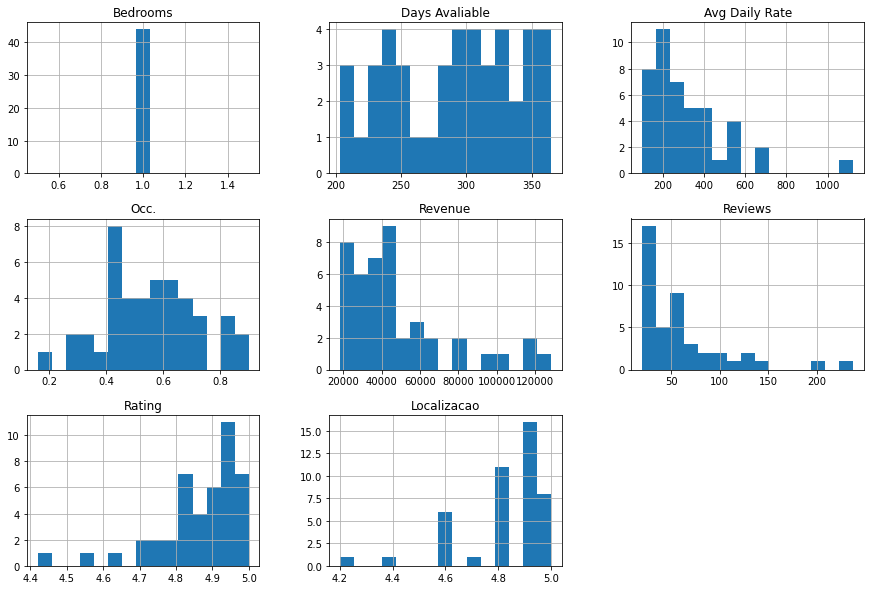

In [41]:
# Histograma das variáveis numéricas
df_final.hist(bins=15, figsize=(15,10));

A partir da análise dos histogramas, podemos tirar as seguintes observações:
 - A quantidade de quartos é igual para todos os anúncios;
 - Existem poucos casos de taxa média de diária, Faturamento e Reviews fora da méida da maioria;
 - Existem Poucos casos de baixa avaliação de localização e Classificação.

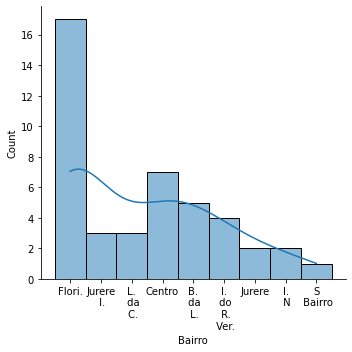

In [45]:
# Verificando quantidade de anúncios por bairro
sns.displot(df_final.replace(dict_bairro), x="Bairro", kde=True)
plt.show()

A partir da análise do histograma, podemos tirar as seguintes observações:
 - Existe uma concentração maior de anúncios em Florianópolis.

<AxesSubplot:>

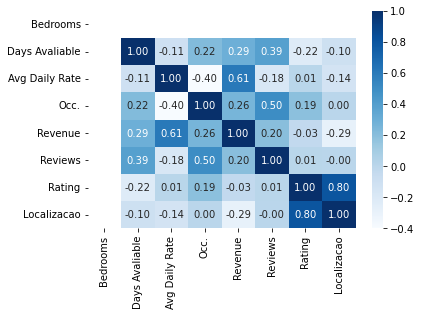

In [50]:
# Visualizando correlação entre as variáveis
sns.heatmap(df_final.corr().round(2), cmap='Blues', annot=True, fmt='.2f')

In [53]:
# Função para construir boxplot
def grafico_boxplot(dataset, var, nome):
    
    if nome == "": nome = var
    sns.boxplot(x="Bairro", y=var, data=dataset)
    plt.ylabel(nome)
    plt.show()

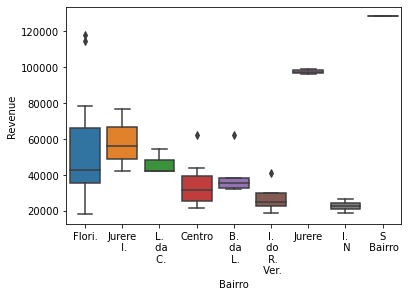

In [54]:
# Faturamento'Revenue' por bairro
grafico_boxplot(df_final.replace(dict_bairro), "Revenue", "Revenue")

In [ ]:
A partir da análise do boxplot, podemos tirar as seguintes observações:
 - Os bairros Florianópolis, Jurerê Internacional e Lagoa da Conceição concentram o maior faturamento.

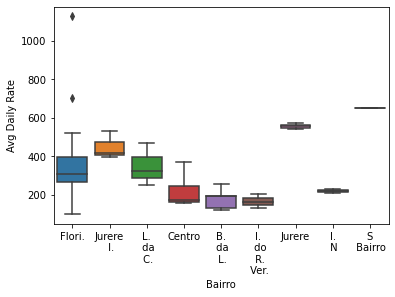

In [55]:
# Taxa média diária 'Avg Daily Rate' por bairro
grafico_boxplot(df_final.replace(dict_bairro), "Avg Daily Rate", "Avg Daily Rate")

In [ ]:
A partir da análise do boxplot, podemos tirar as seguintes observações:
 - Os bairros Florianópolis, Jurerê Internacional e Lagoa da Conceição concentram a maior taxa média diária.

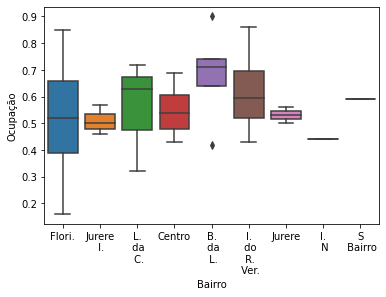

In [57]:
# Taxa de ocupação 'Occ.' por bairro
grafico_boxplot(df_final.replace(dict_bairro), "Occ.", "Ocupação")

A partir da análise do boxplot, podemos tirar as seguintes observações:
 - Ao contrário do que mostrou os boxplots acima, apenas o bairro Lagoa da Conceição fica entre as melhores taxas de ocupação.
 - A maior concentração de taxa de ocupação está no bairro Barra da Lagoa.

In [116]:
# Visualizando os anúncios divididos por bairro para escolher os melhores anúncios levando em consideração todos os critérios
df_final.groupby(['Bairro', 'Listing']).agg(['max']).round(2)

Bedrooms  \
                                                                    max   
Bairro                   Listing                                          
barra da lagoa           https://www.airbnb.com/rooms/20476644        1   
                         https://www.airbnb.com/rooms/23163219        1   
                         https://www.airbnb.com/rooms/32859047        1   
                         https://www.airbnb.com/rooms/44114093        1   
                         https://www.airbnb.com/rooms/45077589        1   
centro                   https://www.airbnb.com/rooms/34748890        1   
                         https://www.airbnb.com/rooms/34749170        1   
                         https://www.airbnb.com/rooms/34749528        1   
                         https://www.airbnb.com/rooms/37110904        1   
                         https://www.airbnb.com/rooms/44322051        1   
                         https://www.airbnb.com/rooms/45802524        1   
                         https://www.airbnb.com/rooms/47221270        1   
florianopolis            https://www.airbnb.com/rooms/10088503        1   
                         https://www.airbnb.com/rooms/10375110        1   
                         https://www.airbnb.com/rooms/1170893         1   
                         https://www.airbnb.com/rooms/16578224        1   
                         https://www.airbnb.com/rooms/17011478        1   
                         https://www.airbnb.com/rooms/19144217        1   
                         https://www.airbnb.com/rooms/21423052        1   
                         https://www.airbnb.com/rooms/21739083        1   
                         https://www.airbnb.com/rooms/22743316        1   
                         https://www.airbnb.com/rooms/28751769        1   
                         https://www.airbnb.com/rooms/35574792        1   
                         https://www.airbnb.com/rooms/36453155        1   
                         https://www.airbnb.com/rooms/39055969        1   
                         https://www.airbnb.com/rooms/4075739         1   
                         https://www.airbnb.com/rooms/4148993         1   
                         https://www.airbnb.com/rooms/690060          1   
                         https://www.airbnb.com/rooms/901903          1   
ingleses do rio vermelho https://www.airbnb.com/rooms/1784271         1   
                         https://www.airbnb.com/rooms/21833478        1   
                         https://www.airbnb.com/rooms/41406424        1   
                         https://www.airbnb.com/rooms/44321789        1   
ingleses norte           https://www.airbnb.com/rooms/20602550        1   
                         https://www.airbnb.com/rooms/40426283        1   
jurere                   https://www.airbnb.com/rooms/36598119        1   
                         https://www.airbnb.com/rooms/40701296        1   
jurere internacional     https://www.airbnb.com/rooms/30814786        1   
                         https://www.airbnb.com/rooms/49910078        1   
                         https://www.airbnb.com/rooms/50133767        1   
lagoa da conceicao       https://www.airbnb.com/rooms/15255160        1   
                         https://www.airbnb.com/rooms/24476227        1   
                         https://www.airbnb.com/rooms/47422405        1   
state of santa catarina  https://www.airbnb.com/rooms/29334162        1   

                                                               Days Avaliable  \
                                                                          max   
Bairro                   Listing                                                
barra da lagoa           https://www.airbnb.com/rooms/20476644            352   
                         https://www.airbnb.com/rooms/23163219            283   
                         https://www.airbnb.com/rooms/32859047            365   
                         https://www.airbnb.com/roo

In [81]:
# Exportando o dataset final
df_final.to_excel('df_final.xlsx',index=False)

In [124]:
# Salvando os melhores anúncios em um novo datafraime
melhores_anuncios = df_final.loc[[10, 8, 5, 11, 39, 9, 34, 14, 3, 4]]
melhores_anuncios.head(11)

,Listing,Bedrooms,Days Avaliable,Avg Daily Rate,Occ.,Revenue,Reviews,Bairro,Rating,Localizacao,Quali_fisica
10,https://www.airbnb.com/rooms/44114093,1,359,192,0.90,62200,96,barra da lagoa,4.96,4.9,Regular
8,https://www.airbnb.com/rooms/44322051,1,245,367,0.69,62000,20,centro,4.56,4.4,Regular
5,https://www.airbnb.com/rooms/47221270,1,245,299,0.60,43700,21,centro,5.00,5.0,Regular
11,https://www.airbnb.com/rooms/4148993,1,326,430,0.84,117800,201,florianopolis,4.86,4.6,Regular
39,https://www.airbnb.com/rooms/16578224,1,234,356,0.81,67700,71,florianopolis,5.00,4.9,Regular
9,https://www.airbnb.com/rooms/44321789,1,362,131,0.86,41000,75,ingleses do rio vermelho,4.96,4.8,Regular
34,https://www.airbnb.com/rooms/20602550,1,259,229,0.44,26300,63,ingleses norte,4.97,5.0,Bom
14,https://www.airbnb.com/rooms/40701296,1,329,539,0.56,99200,29,jurere,4.93,4.8,Bom
3,https://www.airbnb.com/rooms/49910078,1,235,418,0.57,56000,23,jurere internacional,4.93,4.9,Bom
4,https://www.airbnb.com/rooms/47422405,1,298,251,0.72,54200,38,lagoa da conceicao,4.88,4.8,Regular


In [125]:
# Exportando o novo datafraime
melhores_anuncios.to_excel('melhores_anuncios.xlsx',index=False)

![Dashboard_melhores_anuncios](dashboard_comportamento_bairros.png)

- Dashboard feito na ferramenta PowerBI
- O Bairro Florianópolis apresenta os melhores resultados em todos os filtros realizados;
- De acordo com os critérios de seleção, os 3 melhores bairros são: Florianópolis, Centro e Jurerê.